In [262]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import MinMaxScaler

input_folder = 'C:/Users/Davide/workspace/SoccerData/Input/'
output_folder = 'C:/Users/Davide/workspace/SoccerData/Output/'

In [263]:
df = pd.read_csv(input_folder + 'dataset.csv', index_col=0)
players = pd.read_json(input_folder + 'players.json')

In [264]:
players.role = [i['code2'] for i in players.role]
players.loc[players[players.wyId.isin(wyId[42:])].index,'role']= 'FW'
df = df.merge(players[['role', 'wyId']], left_on='playerId', right_on='wyId', how='outer')

In [265]:
wyId = [21001.0, 248950.0, 20495.0,
        70084.0, 25849.0, 135903.0,
       20459.0, 3300.0, 3431.0,
        130.0, 288663.0, 263432.0,
        20461.0, 92966.0, 22883.0,
        37732.0, 20438.0, 625.0,
        40726.0, 7965.0, 14903,
       20443, 3543, 21315,
       285109, 3318, 20879, 265865,
       21171, 114, 286223,
       20845, 22566, 20935,
       116269, 190167,
       3484, 21025, 21169,
       213948, 21123, 15524,
       3313, 14812, 447804,
       11063, 21077, 105334, 21385,
       89186, 20479, 122,
       206314, 3323,
       14943, 8327, 22933]

In [266]:
df.angle_mean.fillna(df.angle_mean.mean(), inplace=True)
df.angle_std.fillna(0, inplace=True)
df.height.fillna(df.height.mean(), inplace=True)
df.weight.fillna(df.weight.mean(), inplace=True)
df.ambidestro.fillna(df.ambidestro.mean(), inplace=True)
df = df.fillna(0)
df = df[df.role=='FW']
df = df.drop(['matchPeriod', 'matchId', 'role', 'wyId'], axis=1)


In [267]:
df.head()

,playerId,foul_pct_WRT_x,accurate_pass_pct_WRP,accurate_shot_pct_WRP,duel_pct_WRT,fk_corner_pct_WRT,fk_cross_pct_WRT,fk_shot_pct_WRT,foul_pct_WRT_y,interception_pct_WRT,...,30,31,32,33,34,40,41,42,43,44
209,23149.0,0.111111,0.259259,0.000000,0.112903,0.0,0.0,0.0,0.111111,0.133333,...,0.000,0.000000,0.050000,0.121212,0.119048,0.000000,0.000000,0.000000,0.100000,0.193548
210,23149.0,0.142857,0.333333,0.000000,0.069565,0.0,0.0,0.0,0.142857,0.033333,...,0.000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.062500,0.111111
211,23149.0,0.200000,0.285714,0.000000,0.108696,0.0,0.0,0.0,0.200000,0.000000,...,0.000,0.000000,0.074074,0.133333,0.078947,0.000000,0.000000,0.090909,0.117647,0.000000
212,23149.0,0.200000,0.545455,0.090909,0.024390,0.0,0.0,0.0,0.200000,0.066667,...,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.157895,0.125000,0.029412
213,23149.0,0.250000,0.192308,0.038462,0.110092,0.0,0.0,0.0,0.250000,0.000000,...,0.025,0.035714,0.111111,0.250000,0.052632,0.066667,0.071429,0.076923,0.100000,0.037037


In [268]:
scaler = MinMaxScaler()
cols = ['standard_deviation', 'posizione_media_x', 'posizione_media_y',
        'angle_mean', 'angle_std', 'height', 'weight', 'yellow_card',
        'tempo_medio_tra_eventi', 'gol', 'assist', 'total_distance']
df_sc = scaler.fit_transform(df[cols])
df = pd.concat((pd.DataFrame(df_sc, columns=cols, index=df.index), 
                 df.drop(cols, axis=1)
                 ), axis=1)

In [269]:
col = ['00', '01', '02', '03',
       '04', '10', '11', '12', '13', '14', '20', '21', '22', '23', '24', '30',
       '31', '32', '33', '34', '40', '41', '42', '43', '44']

def dropout(row):
    ix = row.values.argsort()[-3:][::-1]
    row.iloc[[i for i in range(len(row)) if i not in ix]] =0
    return row


res = [dropout(i[col]) for n,i in df.drop('playerId',1).iterrows()]
df[col] = pd.DataFrame(res, index= df.index)


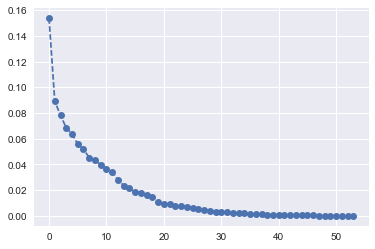

In [270]:
n = 54
pca = PCA(n_components=n)
pca.fit(df.drop('playerId', axis=1))

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_,'--o')

In [271]:
n = 20
pca = PCA(n_components=n)
pca.fit(df.drop('playerId', axis=1))

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[0.15371113 0.08920869 0.07811664 0.06850772 0.06371224 0.0558386
 0.05185443 0.04534636 0.04318295 0.0399326  0.03667695 0.03406378
 0.02802231 0.02359912 0.02133086 0.01845672 0.0176178  0.01653125
 0.01459444 0.01098295]


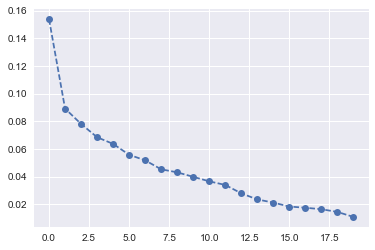

In [272]:
print(pca.explained_variance_ratio_)
plt.plot(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_,'--o')

In [273]:
sum(pca.explained_variance_ratio_)

0.9112875396327605

In [274]:
df1 = pd.DataFrame(pca.transform(df.drop('playerId', axis=1)), columns=['c_%d' % i for i in range(n)])
df1['playerId'] = df.playerId.values

In [275]:
# from sklearn.decomposition import KernelPCA

# ica = KernelPCA(n_components = n, kernel= 'rbf')
# ica.fit(df.drop('playerId', axis=1))

# df1 = pd.DataFrame(ica.transform(df.drop('playerId', axis=1)), columns=['c_%d' % i for i in range(n)])
# df1['playerId'] = df.playerId.values

In [276]:
centr = np.array([df1[df1.playerId.isin(wyId[42:45])].drop('playerId', 1).mean().values,
                 df1[df1.playerId.isin(wyId[45:49])].drop('playerId', 1).mean().values,
                 df1[df1.playerId.isin(wyId[49:52])].drop('playerId', 1).mean().values,
                 df1[df1.playerId.isin(wyId[52:54])].drop('playerId', 1).mean().values,
                 df1[df1.playerId.isin(wyId[54:57])].drop('playerId', 1).mean().values])

lab_str = ['EXW','SKW','CMF','CYS','TGM']

In [277]:
kmeans = KMeans(n_clusters=5, random_state=42, init=centr).fit(df1.drop('playerId', axis=1))

C:\Users\Davide\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:893: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [278]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [279]:
df1['target'] =[lab_str[i] for i in kmeans.labels_]

In [280]:
df1.target.value_counts()

EXW    1507
CYS    1212
TGM     888
SKW     417
CMF     337
Name: target, dtype: int64

In [281]:
def p(id):
    print(players[players.wyId==id].shortName)
    print(df1[df1.playerId==id].target.value_counts())
    print('-------')
    
for id in wyId[42:]:
    p(id)


33    Jos\u00e9 Callej\u00f3n
Name: shortName, dtype: object
SKW    47
EXW    20
CMF     8
CYS     1
Name: target, dtype: int64
-------
160    I. Peri\u0161i\u0107
Name: shortName, dtype: object
CYS    56
CMF    17
SKW     1
Name: target, dtype: int64
-------
363    F. Chiesa
Name: shortName, dtype: object
TGM    62
CMF     8
EXW     1
Name: target, dtype: int64
-------
137    Suso
Name: shortName, dtype: object
SKW    33
EXW    19
CMF    11
CYS     4
Name: target, dtype: int64
-------
313    A. G\u00f3mez
Name: shortName, dtype: object
SKW    39
CYS    16
CMF     9
Name: target, dtype: int64
-------
88    Douglas Costa
Name: shortName, dtype: object
EXW    22
CMF    12
SKW     9
CYS     7
Name: target, dtype: int64
-------
344    L. Insigne
Name: shortName, dtype: object
CYS    49
CMF    22
SKW     2
Name: target, dtype: int64
-------
414    P. Dybala
Name: shortName, dtype: object
SKW    31
CYS    24
CMF     3
Name: target, dtype: int64
-------
241    F. Quagliarella
Name: shortName,

In [283]:
# from sklearn.manifold import TSNE

# x = df1.drop('playerId',1).values
# X_embedded = TSNE(n_components=2).fit_transform(x)

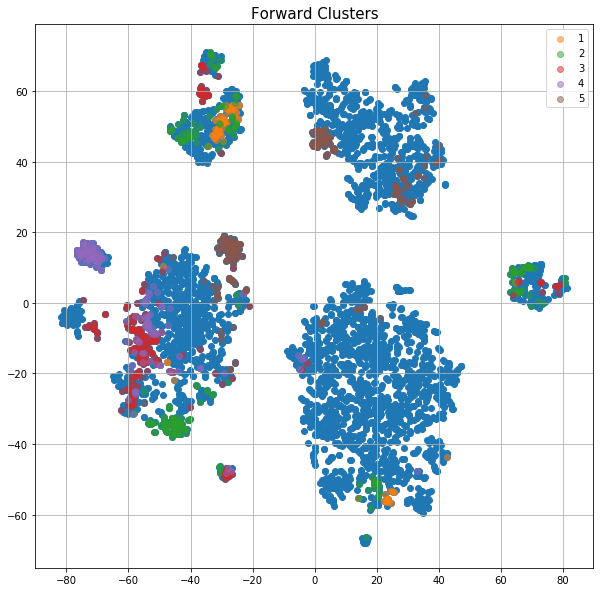

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,10))
plt.title('Forward Clusters', fontsize = 15)
plt.scatter(X_embedded[:,0],X_embedded[:,1])

ix = df1.reset_index()[df1.playerId.isin(wyId[42:45])].index.values
plt.scatter(X_embedded[ix,0],X_embedded[ix,1], label = '1', alpha =0.5)


ix = df1.reset_index()[df1.playerId.isin(wyId[45:49])].index.values
plt.scatter(X_embedded[ix,0],X_embedded[ix,1], label = '2', alpha =0.5)


ix = df1.reset_index()[df1.playerId.isin(wyId[49:52])].index.values
plt.scatter(X_embedded[ix,0],X_embedded[ix,1], label = '3', alpha =0.5)


ix = df1.reset_index()[df1.playerId.isin(wyId[52:54])].index.values
plt.scatter(X_embedded[ix,0],X_embedded[ix,1], label = '4', alpha =0.5)


ix = df1.reset_index()[df1.playerId.isin(wyId[54:57])].index.values
plt.scatter(X_embedded[ix,0],X_embedded[ix,1], label = '5', alpha =0.5)

plt.legend(fontsize = 10)
plt.grid()

In [93]:
# fig.savefig(output_folder + 'attck')

In [284]:
from sklearn.externals import joblib

joblib.dump(pca,output_folder + 'pca_fw')
joblib.dump(kmeans,output_folder + 'kmeans_fw')

['C:/Users/Davide/workspace/SoccerData/Output/kmeans_fw']